In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import folium
import folium

In [2]:
file_path = "./Dataset.csv"
data = pd.read_csv(file_path,
                   parse_dates=['differ_HHMM','S_time'])

/var/folders/3b/kvh2k24j4zb04tnyp8w57xt80000gn/T/ipykernel_19180/1664335287.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path,


In [3]:
data_copy = data.copy()

In [4]:
print('Total Number of {} rows and {} columns in the Accident dataset'.format(data.shape[0],data.shape[1]))

Total Number of 192 rows and 13 columns in the Accident dataset


In [5]:
print("Null values in the dataset?: {}".format(data.isnull().values.any()))

Null values in the dataset?: False


In [6]:
print(data.dtypes)

ID_Start_Lat_Lonh                int64
Severity                         int64
differ_HHMM             datetime64[ns]
S_time                  datetime64[ns]
Month                            int64
Start_Lat                      float64
Start_Lng                      float64
Distance.mi.                   float64
Accident.Description            object
Traffic.Speed                    int64
Street                          object
City                            object
Weather_Condition               object
dtype: object


In [7]:
le=LabelEncoder()

In [8]:
data['Accident.Description']=le.fit_transform(data['Accident.Description'])
data['Accident.Description']

0      3
1      3
2      7
3      3
4      3
      ..
187    3
188    0
189    1
190    3
191    1
Name: Accident.Description, Length: 192, dtype: int64

In [9]:
data['Street']=le.fit_transform(data['Street'])
data['Street']

0      10
1      10
2       5
3      13
4      14
       ..
187    13
188     8
189     9
190    13
191     6
Name: Street, Length: 192, dtype: int64

In [10]:
data['City']=le.fit_transform(data['City'])


In [11]:
data['Weather_Condition']=le.fit_transform(data['Weather_Condition'])

In [12]:
print(data.dtypes)

ID_Start_Lat_Lonh                int64
Severity                         int64
differ_HHMM             datetime64[ns]
S_time                  datetime64[ns]
Month                            int64
Start_Lat                      float64
Start_Lng                      float64
Distance.mi.                   float64
Accident.Description             int64
Traffic.Speed                    int64
Street                           int64
City                             int64
Weather_Condition                int64
dtype: object


In [13]:
X = data.drop(columns=['Severity'])
y = data['Severity']

In [14]:
print(X.head(5))

   ID_Start_Lat_Lonh         differ_HHMM              S_time  Month  \
0                  1 2023-09-24 00:45:00 2017-12-30 09:01:00     12   
1                  1 2023-09-24 00:59:00 2017-12-27 13:18:00     12   
2                  6 2023-09-24 00:29:00 2017-12-22 17:52:00     12   
3                  8 2023-09-24 00:30:00 2017-12-19 20:22:00     12   
4                  9 2023-09-24 00:27:00 2017-12-15 22:33:00     12   

   Start_Lat  Start_Lng  Distance.mi.  Accident.Description  Traffic.Speed  \
0   41.10979  -73.80144           0.0                     3             28   
1   41.10979  -73.80144           0.0                     3             25   
2   40.77143  -73.87611           0.0                     7             20   
3   41.67018  -73.78852           0.0                     3             39   
4   41.40964  -73.78676           0.0                     3             39   

   Street  City  Weather_Condition  
0      10     6                  5  
1      10     6               

In [15]:

X['differ_HHMM']=le.fit_transform(X['differ_HHMM'])
X['S_time']=le.fit_transform(X['S_time'])

In [16]:
print(X.dtypes)

ID_Start_Lat_Lonh         int64
differ_HHMM               int64
S_time                    int64
Month                     int64
Start_Lat               float64
Start_Lng               float64
Distance.mi.            float64
Accident.Description      int64
Traffic.Speed             int64
Street                    int64
City                      int64
Weather_Condition         int64
dtype: object


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=1)

In [18]:
X_test_copy=X_test.copy()

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [22]:
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9482758620689655


In [23]:
print(confusion_matrix(y_test, y_pred))

[[28  2]
 [ 1 27]]


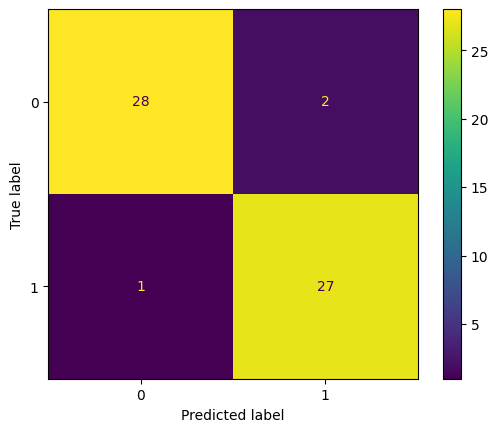

In [24]:
# Assuming you have your classifier 'clf', test data 'X_test', and corresponding true labels 'y_test'

# Get the predicted labels from your classifier
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Show the plot
plt.show()

In [25]:
df = pd.DataFrame(X_test_copy)

In [26]:
print(df)

     ID_Start_Lat_Lonh  differ_HHMM  S_time  Month  Start_Lat  Start_Lng  \
44                  16            4     147     10   40.74010  -73.84543   
69                  35            8     122      8   41.77643  -73.76835   
161                 26            4      30      2   40.69165  -73.99931   
35                  40            8     156     10   40.82445  -73.87260   
182                 26            4       9      1   40.69165  -73.99931   
11                  19            7     180     11   40.82236  -73.88721   
122                 66            4      69      4   40.70174  -73.99126   
81                  26            4     110      7   40.69165  -73.99931   
110                 20            4      81      5   41.05513  -73.81042   
180                 12            4      11      1   40.73431  -73.92232   
172                  9            5      19      2   41.40964  -73.78676   
127                 40            8      64      4   40.82445  -73.87260   
29          

In [27]:
df['y_test']=y_test

In [28]:
df['y_pred']=y_pred

In [29]:
print(df)

     ID_Start_Lat_Lonh  differ_HHMM  S_time  Month  Start_Lat  Start_Lng  \
44                  16            4     147     10   40.74010  -73.84543   
69                  35            8     122      8   41.77643  -73.76835   
161                 26            4      30      2   40.69165  -73.99931   
35                  40            8     156     10   40.82445  -73.87260   
182                 26            4       9      1   40.69165  -73.99931   
11                  19            7     180     11   40.82236  -73.88721   
122                 66            4      69      4   40.70174  -73.99126   
81                  26            4     110      7   40.69165  -73.99931   
110                 20            4      81      5   41.05513  -73.81042   
180                 12            4      11      1   40.73431  -73.92232   
172                  9            5      19      2   41.40964  -73.78676   
127                 40            8      64      4   40.82445  -73.87260   
29          

In [30]:
df.to_csv('SeverityPoint.csv', index=False)

In [31]:
location = "./SeverityPoint.csv"

In [32]:
PP = pd.read_csv(location)

In [33]:
map = folium.Map(location=[PP.Start_Lat.mean(), PP.Start_Lng.mean()], zoom_start=14, control_scale=True)

In [34]:
for index, location_info in PP.iterrows():
    folium.Marker([location_info["Start_Lat"], location_info["Start_Lng"]],tooltip=[location_info["y_pred"],location_info["y_test"]],popup="<stong>prediction,test</stong>").add_to(map)

In [35]:
map

In [36]:
New_file = pd.read_csv("./dummy_file.csv",
                       parse_dates=['differ_HHMM','S_time'])

/var/folders/3b/kvh2k24j4zb04tnyp8w57xt80000gn/T/ipykernel_19180/1216115250.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  New_file = pd.read_csv("./dummy_file.csv",


In [37]:
New_file_copy = New_file.copy()

In [38]:
New_file['Accident.Description']=le.fit_transform(New_file['Accident.Description'])
New_file['Street']=le.fit_transform(New_file['Street'])
New_file['City']=le.fit_transform(New_file['City'])
New_file['Weather_Condition']=le.fit_transform(New_file['Weather_Condition'])

In [39]:
New_file['differ_HHMM']=le.fit_transform(New_file['differ_HHMM'])
New_file['S_time']=le.fit_transform(New_file['S_time'])

In [40]:
New_file = scaler.fit_transform(New_file)

In [41]:
New_pred = clf.predict(New_file)
New_df = pd.DataFrame(New_file_copy)
New_df['y_pred'] = New_pred

In [42]:
Temp = pd.read_csv("./accident_data_both_speed_16_17_18_19_20.csv")
New_Sev = Temp['Severity']
New_Sev = New_Sev.iloc[:56]

In [43]:
New_Sev

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     2
8     4
9     3
10    2
11    2
12    2
13    2
14    2
15    3
16    2
17    3
18    4
19    4
20    4
21    1
22    1
23    2
24    3
25    2
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    2
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    2
55    2
Name: Severity, dtype: int64

In [44]:
print("Accuracy:",metrics.accuracy_score(New_pred,New_Sev))

Accuracy: 0.6964285714285714


In [45]:
df1 = pd.DataFrame(New_file_copy)

In [46]:
df1['New_pred']=New_pred

In [47]:
df1.to_csv('Increment_map.csv', index=False)

In [48]:
location1= "./Increment_map.csv"

In [49]:
PP1 = pd.read_csv(location1)

In [50]:
map1 = folium.Map(location=[PP1.Start_Lat.mean(), PP1.Start_Lng.mean()], zoom_start=14, control_scale=True)

In [51]:
for index, location_info in PP1.iterrows():
    folium.Marker([location_info["Start_Lat"], location_info["Start_Lng"]],tooltip=[location_info["New_pred"]],popup="<stong>prediction</stong>").add_to(map1)

In [52]:
map1